In [0]:
#%reload_ext autoreload
#%autoreload 2
%matplotlib inline

In [0]:
import os
import io
import tarfile
import numpy as np
import PIL


from fastai.vision import *

In [0]:
os.environ['KAGGLE_USERNAME'] = "arunrk7" # username from the json file
os.environ['KAGGLE_KEY'] = "25dbb2e10820d88ba10574246a9b83dd"

In [11]:
! kaggle datasets download -d puneet6060/intel-image-classification

 97% 337M/346M [00:06<00:00, 59.5MB/s]
100% 346M/346M [00:06<00:00, 57.0MB/s]


In [12]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jpg  
  inflating: seg_train/seg_train/mountain/7695.jp

In [0]:
sPath = Path("/content/seg_train/seg_train")

In [0]:
classes = os.listdir('/content/seg_train/seg_train')

In [17]:
for c in classes:
    verify_images(sPath/c, delete=True, max_workers=8)

In [0]:
np.random.seed(7)
src = (ImageList.from_folder(sPath)
       .split_by_rand_pct(valid_pct=0.2)
       .label_from_folder())

In [0]:
tfdm = get_transforms(max_rotate=25, max_zoom=1.3, max_warp=0.4)

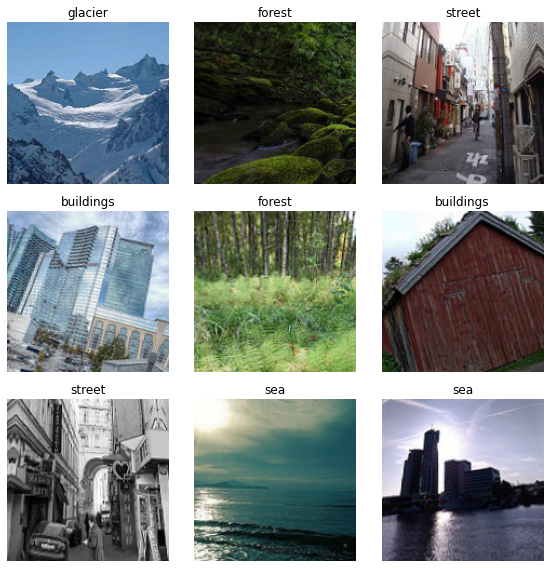

In [23]:
data =  (src.transform(tfdm, size=150)
            .databunch(bs=124)
            .normalize(imagenet_stats))

data.show_batch(rows=3,figsize=(8,8))

In [24]:
learner34 = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


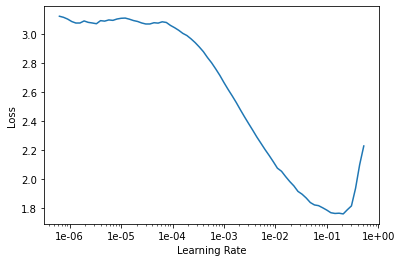

In [25]:
learner34.lr_find()
learner34.recorder.plot()

In [0]:
lr = 1e-03

In [28]:
learner34.fit_one_cycle(10, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.450741,0.482795,0.825731,01:05
1,0.774836,0.362163,0.881326,01:05
2,0.593826,0.312423,0.896650,01:05
3,0.490141,0.292296,0.902708,01:05
4,0.421866,0.263516,0.911974,01:05
5,0.382626,0.246156,0.911974,01:05
6,0.357263,0.241050,0.915538,01:05
7,0.340986,0.235219,0.916251,01:06
8,0.327536,0.231079,0.919815,01:05
9,0.319964,0.229542,0.919815,01:05


In [0]:
learner34.save('resnet34-prototype1')

In [0]:
learner50 = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


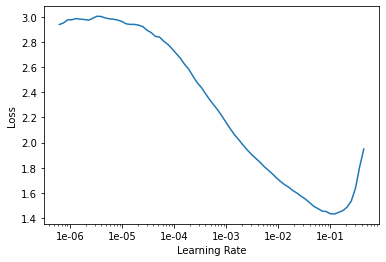

In [0]:
learner50.lr_find()
learner50.recorder.plot()

In [0]:
learner50.fit_one_cycle(10, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.855914,0.399636,0.865645,00:51
1,0.571002,0.339519,0.881326,00:51
2,0.452243,0.275490,0.907698,00:50
3,0.366880,0.270797,0.896650,00:49
4,0.334857,0.246077,0.902708,00:49
5,0.293627,0.242732,0.912331,00:48
6,0.274406,0.225399,0.915182,00:48
7,0.251721,0.217820,0.919102,00:48
8,0.241890,0.215131,0.917320,00:48
9,0.235415,0.216190,0.917320,00:49


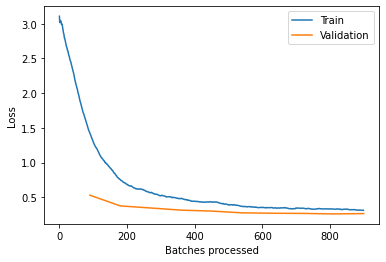

In [0]:
learner34.recorder.plot_losses()

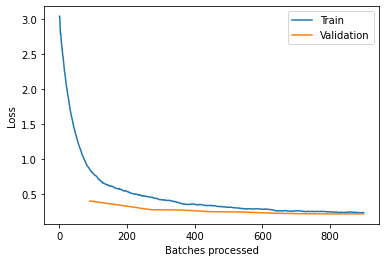

In [0]:
learner50.recorder.plot_losses()

In [0]:
learner50.save('resnet50-prototype1')

In [0]:
interp = ClassificationInterpretation.from_learner(learner50)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

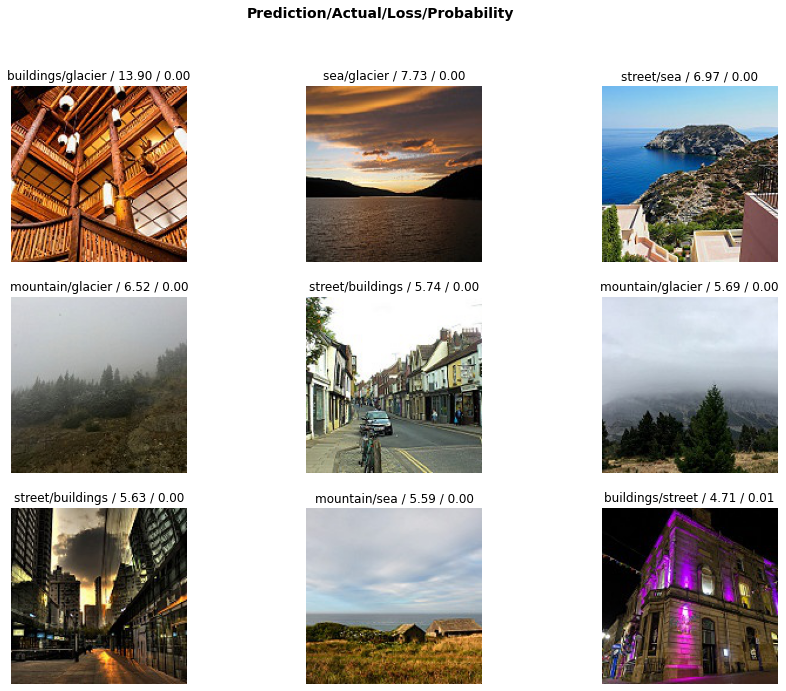

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

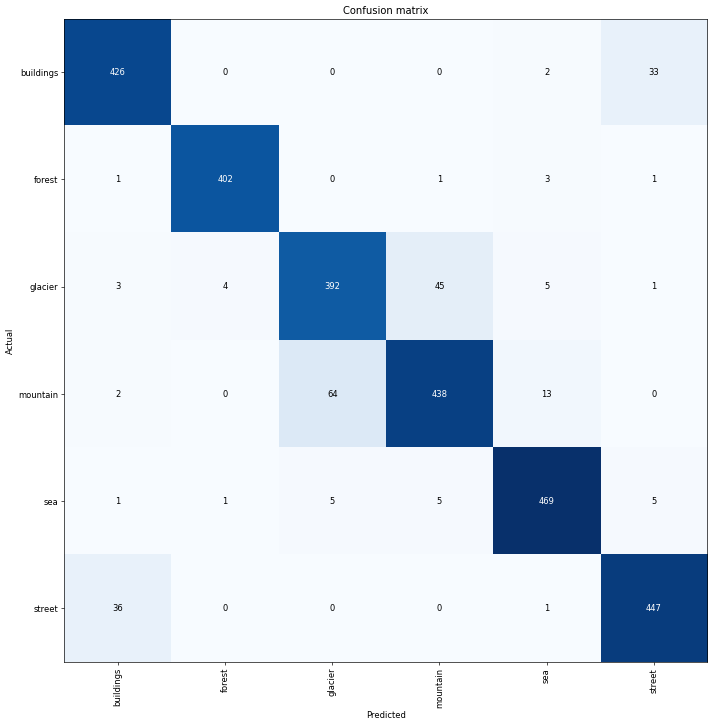

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('mountain', 'glacier', 64),
 ('glacier', 'mountain', 45),
 ('street', 'buildings', 36),
 ('buildings', 'street', 33),
 ('mountain', 'sea', 13),
 ('glacier', 'sea', 5),
 ('sea', 'glacier', 5),
 ('sea', 'mountain', 5),
 ('sea', 'street', 5),
 ('glacier', 'forest', 4),
 ('forest', 'sea', 3),
 ('glacier', 'buildings', 3),
 ('buildings', 'sea', 2),
 ('mountain', 'buildings', 2)]

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


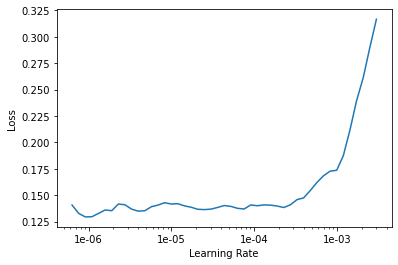

In [0]:
learner50.unfreeze()
learner50.lr_find()
learner50.recorder.plot()

In [0]:
learner50.fit_one_cycle(3, max_lr=slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.114386,0.210755,0.927299,00:53
1,0.121473,0.208586,0.929437,00:52
2,0.091076,0.200671,0.933713,00:52


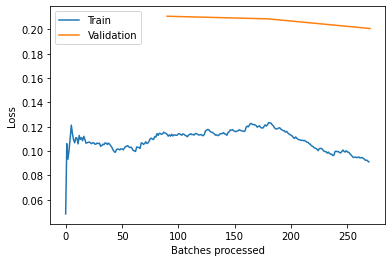

In [0]:
learner50.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learner50)

In [0]:
interp.most_confused(min_val=1)

[('mountain', 'glacier', 47),
 ('glacier', 'mountain', 45),
 ('buildings', 'street', 30),
 ('street', 'buildings', 26),
 ('sea', 'mountain', 6),
 ('glacier', 'sea', 4),
 ('mountain', 'sea', 4),
 ('sea', 'buildings', 4),
 ('glacier', 'forest', 3),
 ('buildings', 'sea', 2),
 ('forest', 'sea', 2),
 ('glacier', 'buildings', 2),
 ('sea', 'forest', 2),
 ('sea', 'glacier', 2),
 ('street', 'sea', 2),
 ('forest', 'mountain', 1),
 ('glacier', 'street', 1),
 ('mountain', 'buildings', 1),
 ('mountain', 'forest', 1),
 ('street', 'forest', 1)]

In [0]:
test_path = '/content/seg_test/seg_test/'

In [0]:
test_Data = (ImageList.from_folder(test_path)
       .split_by_rand_pct(valid_pct=0.2)
       .label_from_folder()
       .transform(size=150)
       .databunch(bs=64))

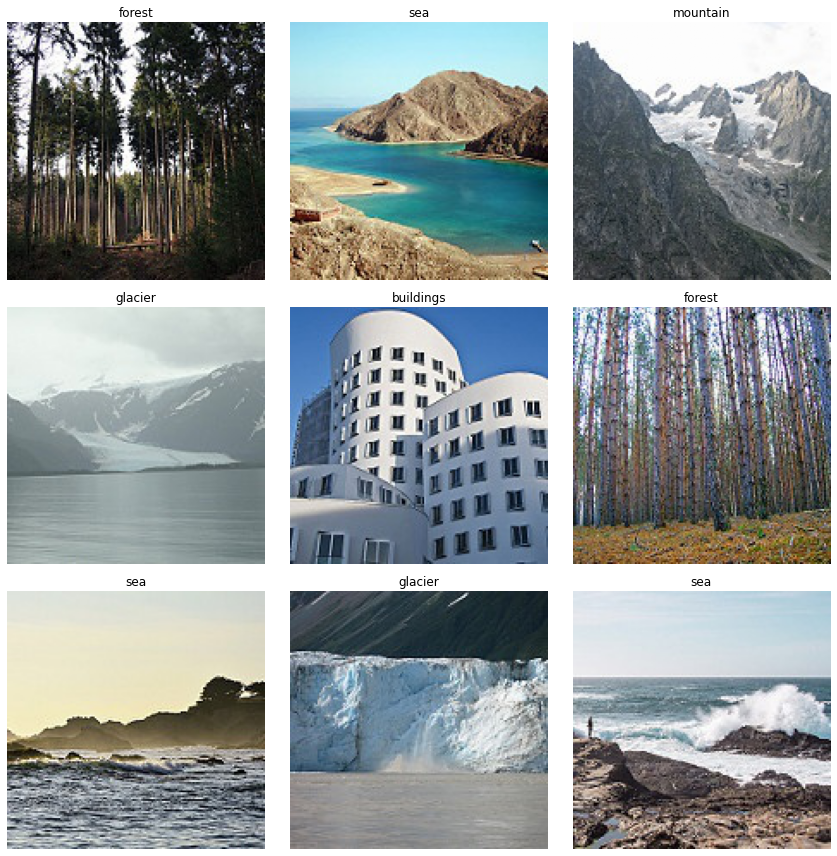

In [0]:
test_Data.show_batch(rows=3)

In [0]:
pred, y = learner50.get_preds(test_Data)

In [0]:
pred

tensor([[1.6198e-02, 7.9480e-09, 3.0362e-08, 8.6139e-07, 1.8964e-06, 9.8380e-01],
        [6.8132e-04, 1.9264e-07, 1.3302e-08, 4.7482e-08, 6.7994e-09, 9.9932e-01],
        [1.5165e-04, 8.1363e-08, 8.2896e-09, 7.1223e-08, 2.5141e-07, 9.9985e-01],
        ...,
        [8.7382e-09, 1.0000e+00, 6.2379e-10, 5.7009e-09, 1.3843e-07, 1.1472e-07],
        [9.9381e-09, 1.0000e+00, 2.8345e-09, 9.0477e-12, 7.3462e-09, 7.1711e-11],
        [1.9850e-07, 9.9935e-01, 6.2125e-08, 1.4073e-07, 1.8820e-06, 6.4862e-04]])

In [0]:
y

tensor([5, 5, 5,  ..., 1, 1, 1])

In [0]:
pred = pred.argmax(dim=1)

In [0]:
pred

tensor([5, 5, 5,  ..., 1, 1, 1])

In [0]:
test_Data.classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1730
           1       1.00      1.00      1.00      1863
           2       0.98      0.98      0.98      1954
           3       0.98      0.98      0.98      1995
           4       1.00      1.00      1.00      1788
           5       0.98      0.99      0.99      1898

    accuracy                           0.99     11228
   macro avg       0.99      0.99      0.99     11228
weighted avg       0.99      0.99      0.99     11228

